<a href="https://colab.research.google.com/github/SamanMansoor/Face-recognization/blob/main/Face_Recognization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Library**

In [ ]:
!pip install rarfile

In [ ]:
!pip install opencv-python

In [ ]:
!pip install tensorflow

# **Import library**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import layers, models
import rarfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from sklearn.metrics import classification_report


# **Load Dataset**

In [ ]:

rar_file_path = '/content/lfw_funneled.rar'

# Create a RarFile object
rar = rarfile.RarFile(rar_file_path)

# List the contents of the RAR file
for file in rar.infolist():
    print(f"File Name: {file.filename}")
    print(f"File Size: {file.file_size} bytes")
    print(f"Compressed Size: {file.compress_size} bytes")

    # Extract the file to a directory
    rar.extract(file, path='face Dataset')  # Change 'output_directory' to your desired output folder

# Close the RAR file
rar.close()


File Name: lfw_funneled/Alex_Barros/Alex_Barros_0001.jpg
File Size: 15167 bytes
Compressed Size: 14892 bytes
File Name: lfw_funneled/Alex_Barros/Alex_Barros_0002.jpg
File Size: 22433 bytes
Compressed Size: 22326 bytes
File Name: lfw_funneled/Arminio_Fraga/Arminio_Fraga_0001.jpg
File Size: 21119 bytes
Compressed Size: 21011 bytes
File Name: lfw_funneled/Arminio_Fraga/Arminio_Fraga_0002.jpg
File Size: 20559 bytes
Compressed Size: 20318 bytes
File Name: lfw_funneled/Arminio_Fraga/Arminio_Fraga_0003.jpg
File Size: 17052 bytes
Compressed Size: 16952 bytes
File Name: lfw_funneled/Arminio_Fraga/Arminio_Fraga_0004.jpg
File Size: 16940 bytes
Compressed Size: 16732 bytes
File Name: lfw_funneled/Arminio_Fraga/Arminio_Fraga_0005.jpg
File Size: 17114 bytes
Compressed Size: 17018 bytes
File Name: lfw_funneled/Arminio_Fraga/Arminio_Fraga_0006.jpg
File Size: 14151 bytes
Compressed Size: 14027 bytes
File Name: lfw_funneled/Audrey_Sauret/Audrey_Sauret_0001.jpg
File Size: 19270 bytes
Compressed Size: 191

# **Load and Preprocess Images**

In [ ]:

# Define the data directory where your dataset is stored
data_directory = '/content/face Dataset/lfw_funneled'

# Define the image size for preprocessing
image_size = (224, 224)  # Adjust this to your desired image size

# Load and preprocess images
def load_and_preprocess_images(data_directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_directory))

    for class_id, class_name in enumerate(class_names):
        class_directory = os.path.join(data_directory, class_name)
        image_files = sorted(os.listdir(class_directory))

        for image_file in image_files:
            image_path = os.path.join(class_directory, image_file)
            image = cv2.imread(image_path)

            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size)
                images.append(image)
                labels.append(class_id)
            else:
                print(f"Failed to load image: {image_path}")

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load and preprocess the images
images, labels = load_and_preprocess_images(data_directory)


# Verify the loaded data
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")


Number of images: 890
Number of labels: 890


# **Shape oF Images and labels**

In [ ]:
# Access the shape of the 'images' and 'labels' arrays
print("Images shape: ", images.shape)
print("Labels shape: ", labels.shape)

Images shape:  (890, 224, 224, 3)
Labels shape:  (890,)


# **Visualization of 40 Distinct People in the Dataset**

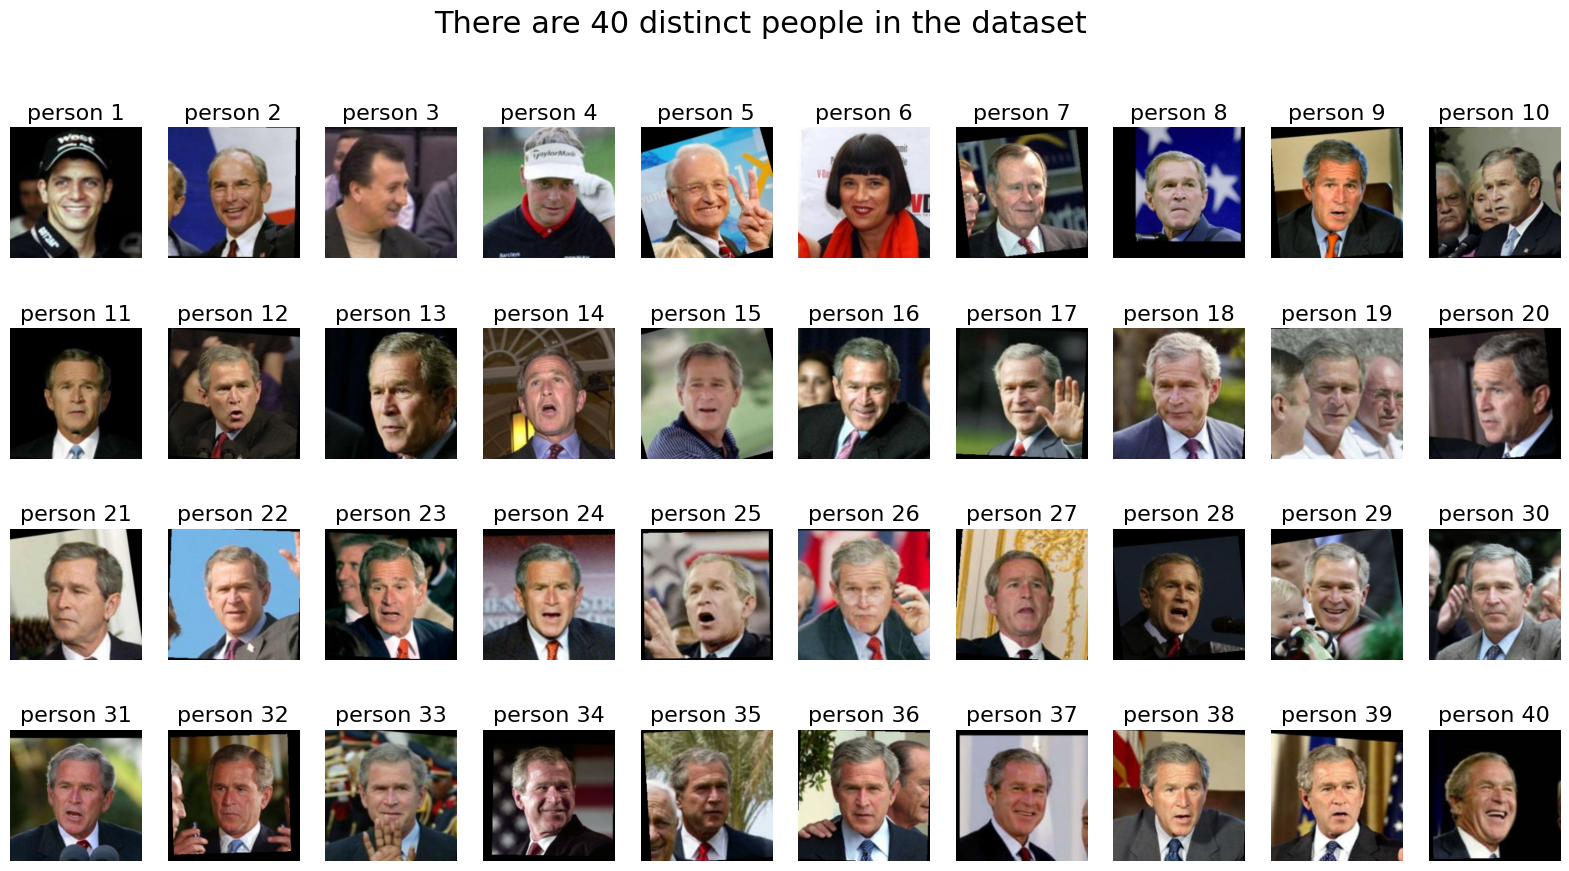

In [ ]:
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = images[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=16)
    plt.axis('off')

plt.suptitle("There are 40 distinct people in the dataset", fontsize=22)
plt.show()

# **Image augmentation**

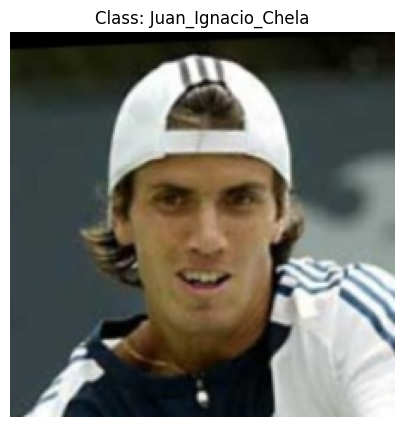

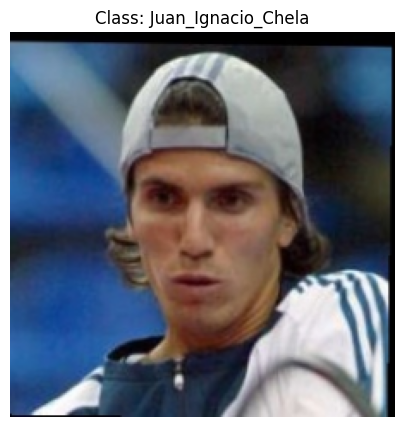

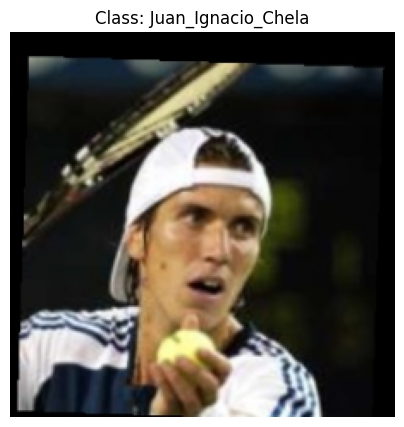

In [ ]:

import random


# Define a function for image augmentation
def augment_image(image):
    # Apply your desired image augmentation techniques using OpenCV
    # For example, you can perform rotation, flipping, etc.
    augmented_image = image
    return augmented_image

data_directory = "/content/face Dataset/lfw_funneled"
class_names = sorted(os.listdir(data_directory))  # Get class names
num_images_to_display = 10  # Number of random images to display
num_classes_to_display = 10  # Number of random classes to display

# Shuffle the class names to select 10 random classes
random.shuffle(class_names)

# Iterate through 10 random classes
for class_name in class_names[:num_classes_to_display]:
    class_directory = os.path.join(data_directory, class_name)
    image_files = sorted(os.listdir(class_directory))

    # Shuffle the image files to select 10 random images
    random.shuffle(image_files)

    # Display 10 random images from this class
for image_file in image_files:
    image_path = os.path.join(class_directory, image_file)
    image = cv2.imread(image_path)

    if image is not None:  # Check if the image was loaded successfully
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, image_size)

        augmented_image = augment_image(image)

        plt.figure(figsize=(5, 5))
        plt.imshow(augmented_image)
        plt.title(f"Class: {class_name}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to load image: {image_path}")



# **Check the data is balance or not**

In [ ]:
import numpy as np


def check_dataset_balance(labels):
    # Count the number of samples in each class
    unique_labels, class_counts = np.unique(labels, return_counts=True)

    # Calculate the class with the minimum count
    min_class_count = np.min(class_counts)

    # Calculate the class with the maximum count
    max_class_count = np.max(class_counts)

    # Calculate the overall class balance
    balance_ratio = min_class_count / max_class_count

    # Print the class counts and balance ratio
    for label, count in zip(unique_labels, class_counts):
        print(f"Class {label}: {count} samples")

    if balance_ratio >= 0.5:
        print("The dataset is imbalanced.")
    else:
        print("The dataset is balanced.")

# Check the balance of your dataset
check_dataset_balance(labels)


Class 0: 2 samples
Class 1: 6 samples
Class 2: 1 samples
Class 3: 1 samples
Class 4: 2 samples
Class 5: 6 samples
Class 6: 4 samples
Class 7: 5 samples
Class 8: 1 samples
Class 9: 1 samples
Class 10: 2 samples
Class 11: 3 samples
Class 12: 1 samples
Class 13: 13 samples
Class 14: 2 samples
Class 15: 1 samples
Class 16: 4 samples
Class 17: 1 samples
Class 18: 13 samples
Class 19: 475 samples
Class 20: 109 samples
Class 21: 1 samples
Class 22: 44 samples
Class 23: 13 samples
Class 24: 2 samples
Class 25: 4 samples
Class 26: 1 samples
Class 27: 2 samples
Class 28: 20 samples
Class 29: 6 samples
Class 30: 2 samples
Class 31: 1 samples
Class 32: 19 samples
Class 33: 7 samples
Class 34: 3 samples
Class 35: 3 samples
Class 36: 3 samples
Class 37: 9 samples
Class 38: 4 samples
Class 39: 18 samples
Class 40: 4 samples
Class 41: 1 samples
Class 42: 4 samples
Class 43: 1 samples
Class 44: 9 samples
Class 45: 18 samples
Class 46: 2 samples
Class 47: 2 samples
Class 48: 1 samples
Class 49: 1 sample

# **Split data Train/Test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
# Ensure data type and normalize
X_train = X_train.astype('uint8')  # Convert data type to uint8
X_test = X_test.astype('uint8')    # Convert data type to uint8

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
y_train = y_train.astype('int')  # Convert label data to integer data type
y_test = y_test.astype('int')    # Convert label data to integer data type


# **Convolutional Neural Network - CNN**

In [ ]:
#Convolutional Neural Network - CNN)
# Implement  CNN architecture


from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
# Define the number of classes (adjust as per your dataset)
num_classes = len(np.unique(labels))
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile and train the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 79s 3s/step - loss: 3.1483 - sparse_categorical_accuracy: 0.4930 - val_loss: 2.2249 - val_sparse_categorical_accuracy: 0.5449
Epoch 2/20
23/23 [==============================] - 77s 3s/step - loss: 1.8645 - sparse_categorical_accuracy: 0.5801 - val_loss: 2.0250 - val_sparse_categorical_accuracy: 0.6292
Epoch 3/20
23/23 [==============================] - 78s 3s/step - loss: 1.4665 - sparse_categorical_accuracy: 0.6531 - val_loss: 1.8053 - val_sparse_categorical_accuracy: 0.6404
Epoch 4/20
23/23 [==============================] - 82s 4s/step - loss: 0.9628 - sparse_categorical_accuracy: 0.7472 - val_loss: 1.8046 - val_sparse_categorical_accuracy: 0.6573
Epoch 5/20
23/23 [==============================] - 77s 3s/step - loss: 0.4598 - sparse_categorical_accuracy: 0.8694 - val_loss: 1.8144 - val_sparse_categorical_accuracy: 0.6517
Epoch 6/20
23/23 [==============================] - 77s 3s/step - loss: 0.1972 - sparse_categorical_accuracy: 

In [ ]:
# Save the trained model to a file
cnn_model.save("CNN_model.h5")

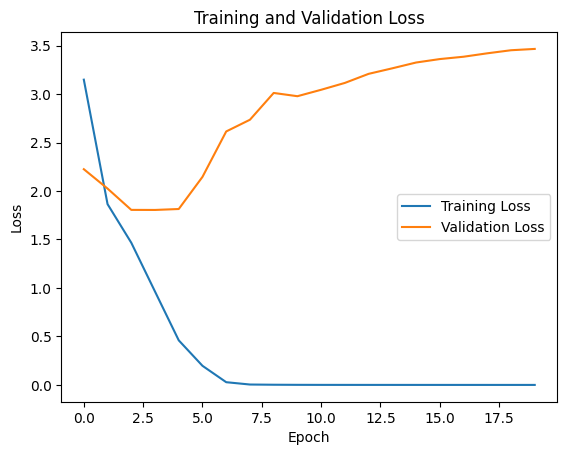

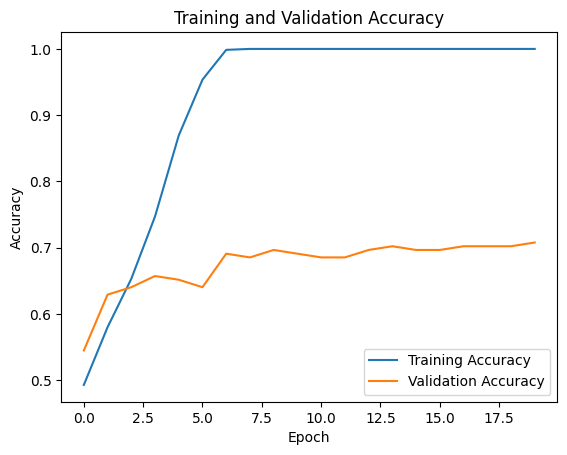

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#**MobileNetV2**

In [ ]:
# Using a pre-trained model (e.g., MobileNetV2) with fine-tuning
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model and train the added layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
23/23 [==============================] - 54s 2s/step - loss: 2.3231 - sparse_categorical_accuracy: 0.5126 - val_loss: 1.8734 - val_sparse_categorical_accuracy: 0.5899
Epoch 2/10
23/23 [==============================] - 35s 2s/step - loss: 1.6076 - sparse_categorical_accuracy: 0.6517 - val_loss: 1.6145 - val_sparse_categorical_accuracy: 0.6461
Epoch 3/10
23/23 [==============================] - 37s 2s/step - loss: 1.3062 - sparse_categorical_accuracy: 0.6980 - val_loss: 1.5893 - val_sparse_categorical_accuracy: 0.6966
Epoch 4/10
23/23 [==============================] - 38s 2s/step - loss: 1.1258 - sparse_categorical_accuracy: 0.7233 - val_loss: 1.4291 - val_sparse_categorical_accuracy: 0.6910
Epoch 5/10
23/23 [==============================] - 38s 2s/step - loss: 0.8787 - sparse_categorical_accuracy: 0.7949 - val_loss: 1.3755 - val_sparse_categorical_accuracy: 0.7191
Epoch 6/10
23/23 [=============================

In [ ]:
# Save the trained model to a file
model.save("your_model_name.h5")


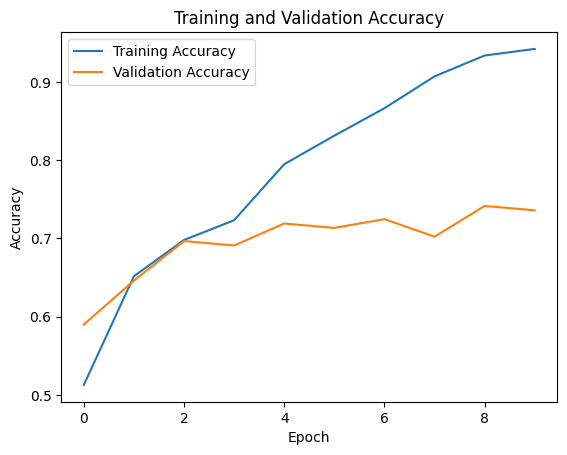

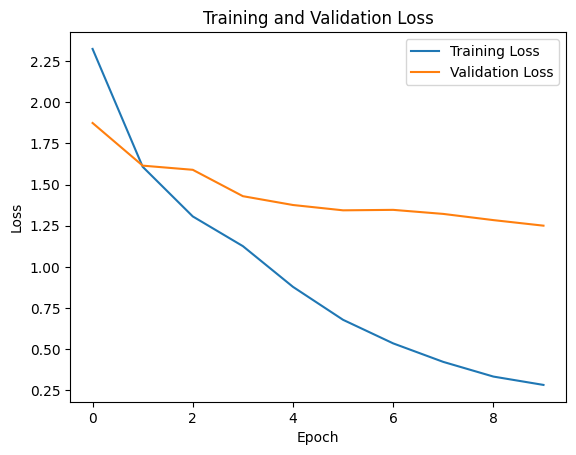

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Random Forest Classifier**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

# Load the saved deep learning model
loaded_model = load_model("your_model_name.h5")

# Extract features from the pre-trained layers
X_train_features = loaded_model.predict(X_train)  # X_train is your training data
X_test_features = loaded_model.predict(X_test)    # X_test is your test data

# Train a machine learning model (e.g., Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the machine learning model using the extracted features
clf.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_features)

# Evaluate the machine learning model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy}")

# Evaluate the machine learning model
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)


6/6 [==============================] - 7s 1s/step
Random Forest Model Accuracy: 0.7415730337078652
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         4
          19       0.87      0.95      0.90        95
          20       0.64      0.82      0.72        22
          22       0.50      0.89      0.64         9
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26

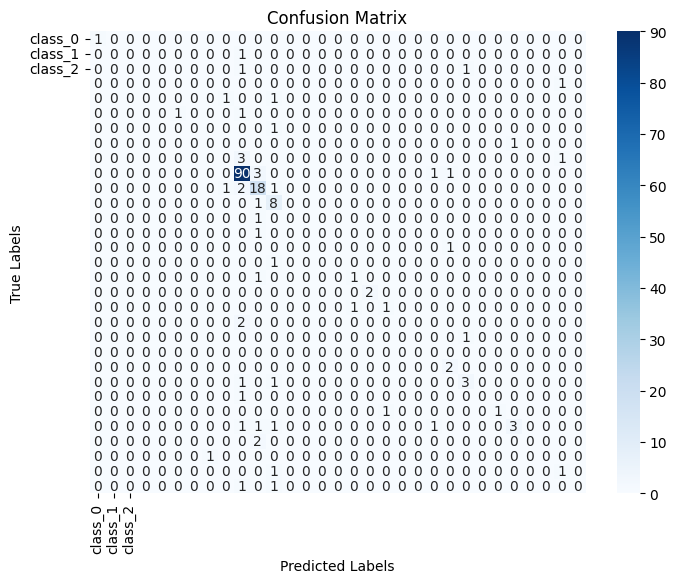

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['class_0', 'class_1', 'class_2'], yticklabels=['class_0', 'class_1', 'class_2'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

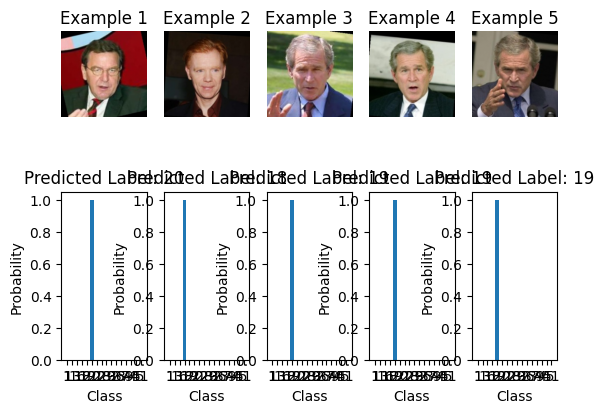

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a few random examples from the test set
num_examples_to_visualize = 5
random_indices = np.random.choice(len(X_test), num_examples_to_visualize, replace=False)

for i, idx in enumerate(random_indices):
    # Display the input image
    plt.subplot(2, num_examples_to_visualize, i + 1)
    plt.imshow(X_test[idx])  # Assuming X_test contains your test images
    plt.title(f"Example {i + 1}")
    plt.axis('off')

    # Display the predicted label
    plt.subplot(2, num_examples_to_visualize, num_examples_to_visualize + i + 1)
    predicted_class = y_pred[idx]  # Assuming y_pred contains the predicted labels
    plt.bar(range(len(np.unique(y_pred))), [0 if j != predicted_class else 1 for j in np.unique(y_pred)])
    plt.title(f"Predicted Label: {predicted_class}")
    plt.xticks(range(len(np.unique(y_pred))), labels=np.unique(y_pred))
    plt.xlabel("Class")
    plt.ylabel("Probability")

plt.show()


# **Support Vector Machine**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_features, y_train)
svm_y_pred = svm_model.predict(X_test_features)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Support Vector Machine Accuracy:", svm_accuracy)

# Print classification report
svm_classification_report_result = classification_report(y_test, svm_y_pred)
print("Support Vector Machine Classification Report:\n", svm_classification_report_result)

Support Vector Machine Accuracy: 0.7247191011235955
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         4
          19       0.83      0.96      0.89        95
          20       0.62      0.82      0.71        22
          22       0.82      1.00      0.90         9
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00   

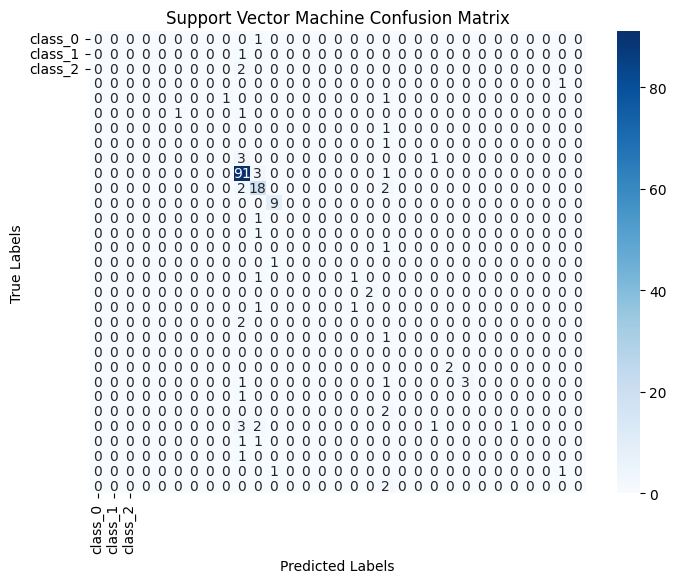

In [ ]:
# Display the confusion matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['class_0', 'class_1', 'class_2'],
            yticklabels=['class_0', 'class_1', 'class_2'])
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

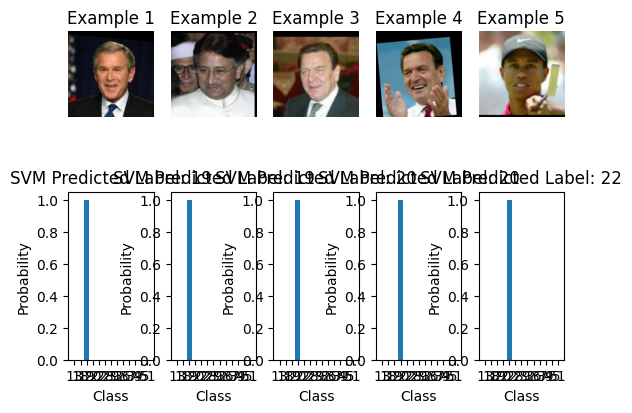

In [ ]:
# Visualize the results
num_examples_to_visualize = 5
random_indices = np.random.choice(len(X_test), num_examples_to_visualize, replace=False)

for i, idx in enumerate(random_indices):
    # Display the input image
    plt.subplot(2, num_examples_to_visualize, i + 1)
    plt.imshow(X_test[idx])  # Assuming X_test contains your test images
    plt.title(f"Example {i + 1}")
    plt.axis('off')

    # Display the predicted label for SVM
    plt.subplot(2, num_examples_to_visualize, num_examples_to_visualize + i + 1)
    predicted_class_svm = svm_y_pred[idx]  # Assuming svm_y_pred contains the predicted labels
    plt.bar(range(len(np.unique(svm_y_pred))), [0 if j != predicted_class_svm else 1 for j in np.unique(svm_y_pred)])
    plt.title(f"SVM Predicted Label: {predicted_class_svm}")
    plt.xticks(range(len(np.unique(svm_y_pred))), labels=np.unique(svm_y_pred))
    plt.xlabel("Class")
    plt.ylabel("Probability")

plt.show()

# **K-Nearest Neighbors**

In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_features, y_train)

knn_y_pred = knn_model.predict(X_test_features)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Print classification report
knn_classification_report_result = classification_report(y_test, knn_y_pred)
print("K-Nearest Neighbors Classification Report:\n", knn_classification_report_result)


K-Nearest Neighbors Accuracy: 0.7303370786516854
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         4
          19       0.87      0.96      0.91        95
          20       0.64      0.82      0.72        22
          22       0.82      1.00      0.90         9
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.0

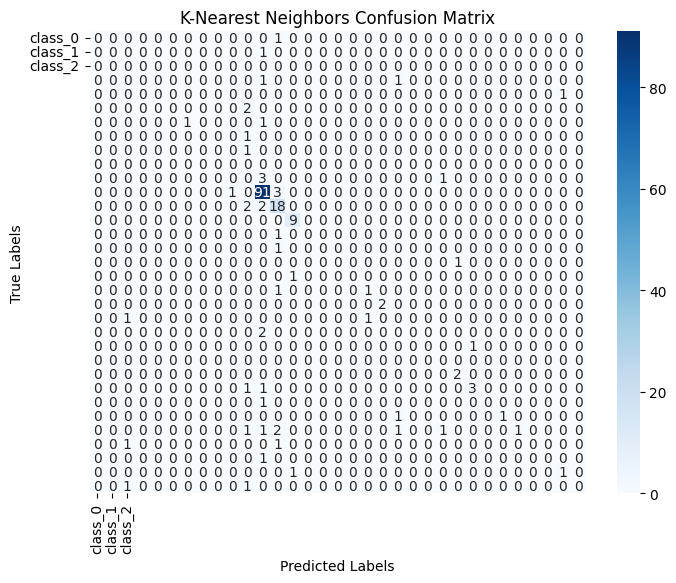

In [ ]:
# Display the confusion matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['class_0', 'class_1', 'class_2'],
            yticklabels=['class_0', 'class_1', 'class_2'])
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

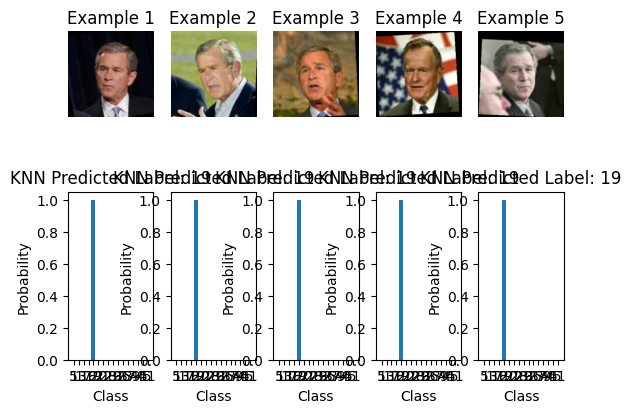

In [ ]:

# Visualize the results
num_examples_to_visualize = 5
random_indices = np.random.choice(len(X_test), num_examples_to_visualize, replace=False)

for i, idx in enumerate(random_indices):
    # Display the input image
    plt.subplot(2, num_examples_to_visualize, i + 1)
    plt.imshow(X_test[idx])  # Assuming X_test contains your test images
    plt.title(f"Example {i + 1}")
    plt.axis('off')

    # Display the predicted label for KNN
    plt.subplot(2, num_examples_to_visualize, num_examples_to_visualize + i + 1)
    predicted_class_knn = knn_y_pred[idx]  # Assuming knn_y_pred contains the predicted labels
    plt.bar(range(len(np.unique(knn_y_pred))), [0 if j != predicted_class_knn else 1 for j in np.unique(knn_y_pred)])
    plt.title(f"KNN Predicted Label: {predicted_class_knn}")
    plt.xticks(range(len(np.unique(knn_y_pred))), labels=np.unique(knn_y_pred))
    plt.xlabel("Class")
    plt.ylabel("Probability")

plt.show()

# **Multilayer Perceptron-MLP Classifier**

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
nn_model.fit(X_train_features, y_train)
nn_y_pred = nn_model.predict(X_test_features)
nn_accuracy = accuracy_score(y_test, nn_y_pred)
print("Neural Network Accuracy:", nn_accuracy)

# Print classification report
nn_classification_report_result = classification_report(y_test, nn_y_pred)
print("Neural Network Classification Report:\n", nn_classification_report_result)

Neural Network Accuracy: 0.7415730337078652
Neural Network Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         4
          19       0.82      0.95      0.88        95
          20       0.65      0.77      0.71        22
          22       0.82      1.00      0.90         9
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         

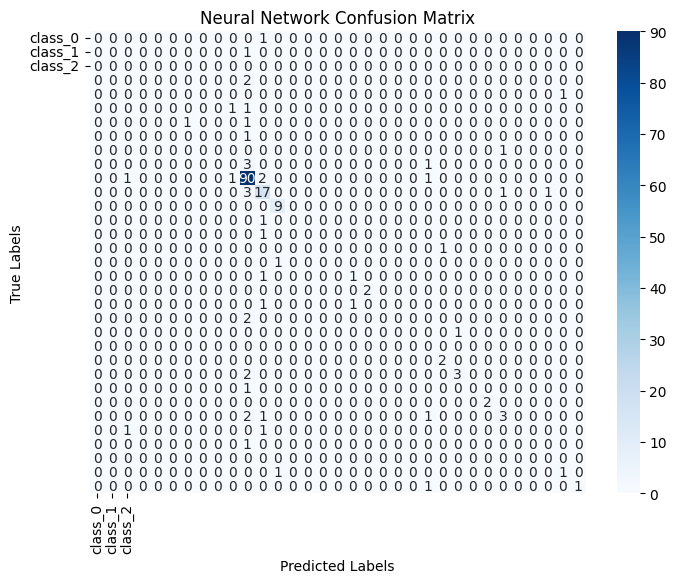

In [ ]:
# Display the confusion matrix
nn_cm = confusion_matrix(y_test, nn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['class_0', 'class_1', 'class_2'],
            yticklabels=['class_0', 'class_1', 'class_2'])
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

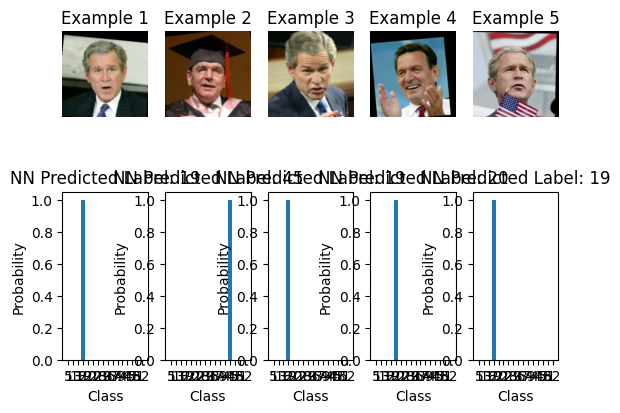

In [ ]:

# Visualize the results
num_examples_to_visualize = 5
random_indices = np.random.choice(len(X_test), num_examples_to_visualize, replace=False)

for i, idx in enumerate(random_indices):
    # Display the input image
    plt.subplot(2, num_examples_to_visualize, i + 1)
    plt.imshow(X_test[idx])  # Assuming X_test contains your test images
    plt.title(f"Example {i + 1}")
    plt.axis('off')

    # Display the predicted label for the Neural Network
    plt.subplot(2, num_examples_to_visualize, num_examples_to_visualize + i + 1)
    predicted_class_nn = nn_y_pred[idx]  # Assuming nn_y_pred contains the predicted labels
    plt.bar(range(len(np.unique(nn_y_pred))), [0 if j != predicted_class_nn else 1 for j in np.unique(nn_y_pred)])
    plt.title(f"NN Predicted Label: {predicted_class_nn}")
    plt.xticks(range(len(np.unique(nn_y_pred))), labels=np.unique(nn_y_pred))
    plt.xlabel("Class")
    plt.ylabel("Probability")

plt.show()